# Assignment 12

### 1.复习上课内容

In [1]:
import gensim
import pandas as pd
import jieba
import re
import math
import numpy as np
import random

In [2]:
data_df = pd.read_csv('zh_news.csv',encoding='gb18030')
data_df = data_df.fillna('')

In [3]:
data_df.head()

,id,author,source,content,feature,title,url
0,89617,,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [4]:
def seg(string):return ' '.join(jieba.lcut(string))

In [5]:
content = data_df["content"].tolist()

In [6]:
def token(string):
    return re.findall(r'[\w|\d]+',string)

In [7]:
news_content = [token(n) for n in content]
news_content = [''.join(n) for n in news_content]
news_content = [seg(n) for n in news_content]

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.586 seconds.
Prefix dict has been built successfully.


In [8]:
len(news_content)

89611

## TF-IDF 

In [9]:
def document_frequency(word):
    return sum(1 for doc in news_content if word in doc)

In [10]:
def idf(word):
    return math.log10(len(news_content) / document_frequency(word))

In [11]:
idf("的")

0.10514661155144739

In [12]:
idf("小米")

2.9523613237924735

In [13]:
def tf(word,document):
    words = document.split()
    return sum(1 for w in words if w==word)

In [14]:
tf("的",news_content[0])

2

In [15]:
def tf_idf(word,document):
    return tf(word,document) * idf(word)

In [16]:
tf_idf("的",news_content[0])

0.21029322310289478

In [17]:
def get_keywords_of_a_document(document):
    words = set(document.split())
    tfidf = [(w,tf_idf(w,document)) for w in words]
    tfidf = sorted(tfidf,key=lambda x:x[1],reverse=True)
    return tfidf

In [18]:
get_keywords_of_a_document(news_content[1])

[('骁龙', 14.28860032832347),
 ('Windows10', 12.14781401040159),
 ('桌面', 8.674990450316585),
 ('高通', 6.392972936239964),
 ('835', 6.363018624300659),
 ('微软', 5.379820468124088),
 ('CPUGPU', 4.9523613237924735),
 ('biglittle', 4.9523613237924735),
 ('二合一', 4.9523613237924735),
 ('835Win10', 4.9523613237924735),
 ('性能', 4.756660112129509),
 ('屏蔽掉', 4.651331328128492),
 ('源码', 4.651331328128492),
 ('Wintel', 4.651331328128492),
 ('基带', 4.475240069072811),
 ('SoC', 4.475240069072811),
 ('Exynos', 4.350301332464511),
 ('Q4', 4.17421007340883),
 ('联发科', 4.107263283778217),
 ('ARM', 4.04927133680053),
 ('PCB', 3.9981188143531488),
 ('华硕', 3.9523613237924735),
 ('平台', 3.8983153086735953),
 ('功耗', 3.6301420290585544),
 ('惠普', 3.6099386429702673),
 ('蓝牙', 3.5721500820808676),
 ('麒麟', 3.4472113454725677),
 ('WiFi', 3.3503013324645115),
 ('处理器', 3.280263465856756),
 ('方案', 3.105375204622871),
 ('小米', 2.9523613237924735),
 ('联想', 2.91493482585185),
 ('按计划', 2.694682748923289),
 ('架构', 2.6736077228396

## TFIDF Vectorizer

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vectorizer = TfidfVectorizer(max_features=10000)

In [21]:
sample_num = 50000
sub_samples = news_content[:sample_num]

In [22]:
X = vectorizer.fit_transform(sub_samples)

In [23]:
len(vectorizer.vocabulary_)

10000

In [24]:
X[1].toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [25]:
np.where(X[1].toarray()[0])

(array([ 100,  281,  360,  372,  472,  578, 1008, 1162, 1244, 1269, 1285,
        1380, 1462, 1886, 2435, 2754, 2760, 2989, 3067, 3353, 3800, 3990,
        4173, 4272, 4429, 4497, 4521, 4529, 4595, 4658, 4961, 5037, 5104,
        5136, 5550, 5717, 5771, 5899, 6035, 6081, 6710, 6971, 7072, 7217,
        7506, 7986, 8025, 8026, 8137, 8207, 8479, 8558, 8799, 9127, 9196,
        9252, 9637, 9744, 9824]),)

In [26]:
document_1,document_2 = random.randint(0,1000),random.randint(0,1000)

In [27]:
document_1

782

In [28]:
document_2

673

In [29]:
news_content[document_1]

'中新网 6 月 11 日电 综合 报道 2020 年 奥运会 将 在 日本 东京 举行 为 提高 女性 运动员 对 这场 体育 盛会 的 参与度 国际奥委会 日前 通过 东京 奥运会 将 新增 16 个 比赛 小项 国际奥委会 体育 总监 麦康奈尔 表示 东京 奥运 的 比赛 细项 将 由 里 约 奥运 的 306 个 增至 321 个 除 增设 男女 混合 团体赛 外 游泳 也 会 新增 男子 800 米 女子 1500 米 及 4100 米 男女 混合 接力 而 三项 铁人 赛 也 会 加入 混合 接力 男性 拳击 独木舟 射击 及 划艇 项目 将会 减少 并 相应 增加 女性 小项 令女 运动员 参赛 比例 由 上届 的 456 增至 488 推动 两性 平等 柔道 的 混合 团体赛 将 由 12 个 参赛 单位 派出 3 男 3 女 角逐 不过 由于 举重 项目 减少 了 1 个 男子 举重 级别 东京 奥运会 实际 增加 15 个 比赛 小项 此外 国际奥委会 执行 委员会 9 日 在 会上 通过 建议 在 9 月 同时 决定 2024 和 2028 年 奥运 的 主办 城市 有关 提议 下 月 于 瑞士 洛桑 的 会议 上 表决'

In [30]:
vector_of_document_1 = X[document_1].toarray()[0]

In [31]:
news_content[document_2]

'原 标题 那个 吃 野菜 获捐 500 万 的 杨 六斤 堂哥 称 捐款 150 万修 公路 想起 之前 的 杨 六斤 不 知道 他 现在 怎么样 了 新闻 的 热度 一旦 过去 就 再 没人 关心 了 微博上 一名 网友 这样 感叹 2014 年 6 月 广西 男孩 杨 六斤 的 故事 感动 了 无数 人 他 的 身世 来到 深圳 又 被 接回 的 经历 还有 那笔 超 500 万 的 慈善 捐款 无不 牵动人心 如今 三年 时间 过去 了 如同 网友 牵挂 的 那样 他 现在 过得 如何 近日 红星 新闻记者 来到 广西 百色市 隆林 县为 你 带来 杨 六斤 的 最新消息 杨 六斤 改了 名字 今年 17 岁 下半年 将 读 初三 你 要 找 谁 6 月 13 日 下午 2 点 百色市 里 一所 中学 门口 在 保安 的 询问 下 记者 表明 了 来意 此前 记者 从 杨 六斤 的 一位 堂叔 处 获悉 六斤 已 从 老家 出来 目前 正 就读于 这所 学校 保安 随后 转告 管理员 去 叫 人 但 过 了 一会儿 保安 告知 记者 并 没有 找到 叫 杨 六斤 的 人 是 一斤 两斤 的 斤 吗 确认 名字 后 保安 忍不住 笑 了 继续 让 人 去 寻找 并 询问 路过 的 学生 班上 有没有 这个 人 仍然 没 找到 你 是不是 搞错 了 保安 也 开始 怀疑 了 并 让 记者 弄清楚 后 再 来 跟 三年 前 杨 六斤 被 置于 聚光灯 下 不停 面对 众多 媒体 采访 的 情况 不同 这 一次 记者 第一站 就 碰 了 壁 随后 记者 来到 隆林各族自治县 汽车站 内一 说起 杨 六斤 小卖部 老板 马上 反应 过来 哦 知道 那个 视频 关于 杨 六斤 的 报道 在 我 手机 里 一直 都 存着 很 感人 当 记者 询问 杨 六斤 的 近况 店老板 则 表示 自己 并 不 清楚 不过 他 猜测 他 可能 是 改 了 名字 不想 再 被 外界 打扰 14 日 记者 从 县里 来到 德峨 镇 继续 打听 随便 找人 一问 镇上 的 摩 的 师傅 餐馆老板 都 知道 杨 六斤 的 故事 却 都 说不出 他 当前 的 情况 之后 记者 又 辗转 来到 新街 村 上马 排屯 找到 杨 六斤 堂哥 杨取 林 的 家 大 门锁 着 邻居 告知 记者 杨取 林 

In [32]:
vector_of_document_2 = X[document_2].toarray()[0]

In [33]:
from scipy.spatial.distance import cosine

In [34]:
def distance(v1,v2):return cosine(v1,v2)

In [35]:
distance(vector_of_document_1,vector_of_document_2)

0.9871911264770054

## LDA

In [36]:
from gensim import corpora, models
import jieba.posseg as jp

In [37]:
news = data_df["content"][:100]

In [38]:
stop_words = []
with open('百度停用词表.txt',encoding='utf-8') as f:
    for word in f.readlines():
        stop_words.append(word.strip())

In [39]:
flags = ('n','nr','ns','nt','v','d')

In [40]:
words_ls = []
for text in news:
    words = [w.word for w in jp.cut(text) if w.flag in flags and w.word not in stop_words]
    words_ls.append(words)

In [41]:
words_ls

[['小米',
  '手机',
  '机型',
  '机型',
  '已',
  '暂停',
  '更新',
  '发布',
  '含',
  '开发',
  '版',
  '体验版',
  '内测',
  '稳定版',
  '暂不',
  '受',
  '确保',
  '工程师',
  '精力',
  '系统优化',
  '精力',
  '用到',
  '发布',
  '距今已有',
  '信息',
  '等待',
  '官方消息'],
 ['桌面',
  '平台',
  '认证',
  '处理器',
  '高通',
  '只',
  '性能',
  '去',
  '核心',
  '正',
  '联手',
  '找到',
  '适合',
  '桌面',
  '平台',
  '兼顾',
  '性能',
  '功耗',
  '方案',
  '报道',
  '称',
  '拿到',
  '源码',
  '更好',
  '理解',
  '架构',
  '资料',
  '显示',
  '集成',
  '基带',
  '蓝牙',
  '传统',
  '方案',
  '节省',
  '至少',
  '空间',
  '按计划',
  '华硕',
  '惠普',
  '联想',
  '首发',
  '电脑',
  '均',
  '形态',
  '产品',
  '高通',
  '也许',
  '还',
  '见到',
  '联发科',
  '华为',
  '麒麟',
  '小米',
  '澎湃',
  '桌面',
  '平台'],
 ['一加',
  '搭载',
  '电池',
  '充',
  '规格',
  '电池',
  '缩水',
  '刘作虎',
  '一加',
  '手机',
  '做',
  '市面',
  '最',
  '大屏',
  '旗舰',
  '设定',
  '资料',
  '一加',
  '手机',
  '拥有',
  '显示屏',
  '双',
  '摄像头',
  '备货',
  '量',
  '京东',
  '泄露',
  '信息',
  '一加',
  '售价'],
 ['葡萄牙', '佩德罗', '冈', '地区', '拍摄', '森林', '大火', '烧毁', '汽车', '新华社', '记者', '张立云'],
 ['原',
  '标题',


In [42]:
dictionary = corpora.Dictionary(words_ls)
corpus = [dictionary.doc2bow(words) for words in words_ls]

In [43]:
lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary,num_topics=5)

In [44]:
for topic in lda.print_topics(num_words=10):
    print(topic)

(0, '0.006*"市场" + 0.005*"中国" + 0.005*"会" + 0.004*"不" + 0.004*"还" + 0.004*"人" + 0.004*"记者" + 0.003*"都" + 0.003*"内容" + 0.003*"技术"')
(1, '0.006*"都" + 0.006*"会" + 0.006*"市场" + 0.005*"不" + 0.005*"中国" + 0.004*"人" + 0.004*"企业" + 0.003*"手机" + 0.003*"还" + 0.003*"内容"')
(2, '0.005*"不" + 0.005*"还" + 0.005*"人" + 0.005*"都" + 0.004*"跨境" + 0.004*"企业" + 0.004*"会" + 0.004*"内容" + 0.002*"说" + 0.002*"平台"')
(3, '0.008*"市场" + 0.006*"都" + 0.005*"乐视" + 0.005*"人" + 0.004*"还" + 0.004*"冰架" + 0.004*"中国" + 0.004*"不" + 0.004*"会" + 0.003*"配送"')
(4, '0.005*"记者" + 0.005*"乐视" + 0.004*"都" + 0.004*"会" + 0.004*"人" + 0.004*"不" + 0.004*"还" + 0.003*"市场" + 0.003*"摄像头" + 0.003*"中国"')


In [45]:
text = data_df["content"][102]

In [46]:
words = [[w.word for w in jp.cut(text) if w.flag in flags and w.word not in stop_words]]

In [47]:
text_corpus = [dictionary.doc2bow(word) for word in words]

In [48]:
topic_dist = list(lda[text_corpus])
print(topic_dist)

[[(0, 0.412622), (1, 0.5810321)]]


### 2.回答以下理论问题

#### 1. 请写一下TF-IDF的计算公式

TF(term frequency)，即词频，用来衡量词在一篇文档中的重要性，频率越高，越重要。计算公式为：$$TF = \frac{某文档中某词出现的次数}{该文档的总词数} $$

IDF((inverse document frequency)，叫做逆文档频率，衡量某个词在所有文档集合中的常见程度。当包含某个词的文档的篇数越多时，这个词也就烂大街了，重要性越低。计算公式为：$$IDF= log\frac{全部文档的数量}{包含某词的文档的数量+1}$$

于是TF-IDF = TF * IDF, 它表明字词的重要性与它在某篇文档中出现的次数成正比，与它在所有文档中出现的次数成反比。

它的第一个假设前提：已经去掉了停用词。

#### 2. LDA算法的基本假设是什么？

LDA的两个假设是：一个文本是关于主题的多项分布，而每个主题是关于单词的多项分布。

LDA认为多项分布的参数也服从一个分布，而不是固定不变的，使用狄利克雷分布作为多项分布的先验分布，也就是多项分布的参数服从狄利克雷分布。

#### 3. 在TextRank算法中构建图的权重是如何得到的？

TextRank是无向图，把一篇文档构建成图，那么词语就是图中的节点，通过滑动窗口确定节点之间的连接关系（哪些节点应该用边来连接），而边上的权重就是相连的两个词的相似度。

具体而言，先得到两个词的词向量，然后求余弦相似度，就得到了权重。

TextRank也需要先去掉停用词。

#### 4. 什么是命名实体识别？ 有什么应用场景？

命名实体识别就是把文本中的实体提取出来，并且给实体标注标签。命名实体识别属于序列标注任务。通用的命名实体识别一般是识别人名、地名和机构名，而特定领域的命名实体识别则根据场景而定，比如医疗领域的命名实体识别就主要是疾病名、治疗手段、药物名等等。

应用场景包括知识图谱的构建。

#### 5.NLP主要有哪几类任务 ？

文本分类任务（意图识别、情感分析、文本打标签）和文本生成任务（生成式摘要、机器翻译）。

### 3.实践题

#### 3.1 手动实现TextRank算法 (在新闻数据中随机提取100条新闻训练词向量和做做法测试）

 提示：
 1. 确定窗口，建立图链接。   
 2. 通过词向量相似度确定图上边的权重
 3. 根据公式实现算法迭代(d=0.85)

In [49]:
from gensim.models import word2vec

In [50]:
# 随机生成100个index，用于随机得到100条新闻
indices = np.random.permutation(np.arange(len(news_content)))

In [51]:
indices = indices[:100]
indices

array([54617, 85602, 86177,  5224, 36832, 76879, 36002, 59754, 36150,
        7564, 57921, 20753, 28756, 63168, 21148, 55914, 29327, 85866,
       15097, 10777, 20417,   933, 45379, 53253, 65540, 55343, 45005,
       76238, 77946, 76185, 71305, 32078, 19315, 24584, 18274, 28724,
        5536, 10843, 52683, 19942, 12756,  1669, 10585, 20953, 37755,
       28971, 61074, 37820, 58107, 29724, 40617,  3588,  5715, 44860,
       68763, 51234,  1904, 38540,  4748, 67558, 48076, 54349,  9498,
       34304, 79128, 31514, 74961, 66451,  7263, 42622, 77636, 43451,
       66653, 25274, 36461, 71056, 88486, 13774, 59541, 59386, 88427,
       21713,  7427, 45396, 61350,  1233, 70785,  9300, 63512, 17134,
        2900, 83755, 30546, 43828, 50977, 70294,  5230, 82770, 21334,
       50676])

In [52]:
w2v_corpus = [news_content[i].split() for i in indices]

In [53]:
w2v_corpus[2]

['新华社',
 '照片',
 '北京',
 '2017',
 '年',
 '6',
 '月',
 '4',
 '日',
 'n',
 '体育',
 '图文',
 '互动',
 '1',
 '当',
 '北京',
 '再次',
 '遇见',
 '五环',
 '张艺谋',
 '团队',
 '独家',
 '揭秘',
 '平昌',
 '冬奥会',
 '北京',
 '8',
 '分钟',
 'n',
 '作为',
 '奥林匹克',
 '历史',
 '上',
 '第一个',
 '既',
 '举办',
 '过',
 '夏季',
 '奥运会',
 '又',
 '将',
 '举办',
 '冬季',
 '奥运会',
 '的',
 '城市',
 '经历',
 '2008',
 '年',
 '奥运会',
 '的',
 '无与伦比',
 '后',
 '2018',
 '年',
 '韩国',
 '平昌',
 '冬奥会',
 '闭幕式',
 '交接仪式',
 '上',
 '北京',
 '将',
 '用',
 '一个',
 '什么样',
 '的',
 '8',
 '分钟',
 '来',
 '展现',
 '自己',
 '新华社',
 '记者',
 '日前',
 '独家',
 '专访',
 '了',
 '参与',
 '北京',
 '8',
 '分钟',
 '创作',
 '的',
 '张艺谋',
 '团队',
 'n',
 '这是',
 '张艺谋',
 '右',
 '三',
 '与',
 '参加',
 '跨界',
 '冰雪',
 '王',
 '的',
 '营员',
 '在',
 '节目',
 '录制',
 '现场',
 '2017',
 '年',
 '1',
 '月',
 '6',
 '日摄',
 'n',
 '新华社',
 '发']

In [54]:
w2v_model = word2vec.Word2Vec(w2v_corpus,
                              size      = 50, 
                              min_count = 1, 
                              window    = 3,
                              workers   = 4,
                              sg        = 1,
                              iter      = 5)

In [55]:
article = news_content[indices[30]]
article

'新华社摄影部 2017 年 05 月 22 日 发稿 目录 中国 新闻 nn 环境 2 云南 兰坪 山清水秀 景色 美 nn 新华社摄影部 今日 重要 稿件 预告 nn 突发事件 后续 6 内蒙古 陈巴尔虎旗 那 吉林 场 森林 火灾 火场 烟点 全部 扑灭 nn 社会 2 上海 花 菖蒲 绽放 迎夏 nn 文化 2 电影 荡寇 风云 即将 上映 nn 图文 互动 3 全国妇联 举办 主题 展和巡 讲 活动 弘扬 最美 家风 nn 教育 4 甘肃 陇南 山乡 孩子 乐享 电子 课堂 优质 教育 nn 文化 2 英国 原版 音乐剧 保镖 中国 首演 新闻 发布会 在京举行 nn 经济 3 河北 泊头 鸭梨 之乡 借 一带 一路 拓展 海外 市场 nn 经济 3 深圳 开行 首趟 中欧 班列 nn 脱贫 攻坚 3 福建 建瓯 小小 竹编 富农 家 nn 科技 4 杭州 举办 全球 智慧 物流 峰会 nn 砥砺 奋进 的 五年 精准 扶贫 驻村 调研 9 五指山 因地制宜 养殖 蜘蛛 助力 贫困户 脱贫致富 nn 社会 3 风餐露宿 斗 火魔 nn 社会 4 河北 秦皇岛 环 长城 旅游 路助民 增收 nn 经济 7 蒙华 铁路 赣江 特 大桥 线下 工程 基本 完工 nn 健康 2 重庆 完成 心脏 复杂 畸形 胎儿 完整 数据 集 采集 nn 环境 2 北京 晚霞 美如画 nn 图文 互动 2 同心 共铸 中国 心为 四川 藏传佛教 界 部分 代表 人士 在 京 开展 体检 nn 图文 互动 我国 首次 发布 中国 的 南极 事业 报告 nn 文化 电影 吃 吃 的 爱 举行 北京 首映礼 nn 时政 张德江 主持 召开 全国人大常委会 固体废物 污染环境 防治法 执法 检查组 第一次 全体会议 nn 图文 互动 5 蛟龙 号 抵达 马里亚纳 海沟 作业区 23 日 在 世界 最深处 下潜 nn 图文 互动 冰心 育 桃李 真情 暖 大山 记 青海 患癌 教师 汪昌祥 nn 新华 全媒 头条 图文 互动 13 荆州 文保 用 双手 接续 二千年 中华文明 长流 nn 图文 互动 长风 几万里 吹度 吉隆 关 探访 中尼 边境 口岸 nn 经济 2 江西 新余 油茶 嫁接 忙 nn 文化 3 文艺 志愿 服务 到 人民 中去 nn 环境 3 国际 生物 多样性 日 中

In [56]:
# 先构建图结构，再计算权重，然后迭代，然后得关键词

In [79]:
"""
textrank 需要去停用词，也需要根据词性去掉一些词。
"""

stop_words = []
with open('百度停用词表.txt',encoding='utf-8') as f:
    for word in f.readlines():
        stop_words.append(word.strip())
        
pos_flag = ('n','nr','ns','nt','v','d')

In [80]:
"""
切词时使用带词性的切词模式，得到一个（word，pos）这样的结果。
如果词性在过滤表中，而且词在停用词表中，就去掉。
"""
def filter_word(wp):
        return (wp.flag in pos_flag and len(wp.word.strip()) >= 2 and wp.word not in stop_words)

In [81]:
"""用训练好的word2vec可以直接得到两个词的余弦相似度"""

def weight_of_edge(w1,w2):
    return w2v_model.wv.similarity(w1,w2) 

In [82]:
from collections import defaultdict
from jieba.posseg import cut

"""根据窗口的大小，确定词的共现关系，来确定图的连接
代码参考jieba中textrank的实现，
可是jieba中的权重是根据词之间共现的频率来确定，
我们这里是用词向量计算余弦相似度，来作为边上的权重。
"""

def create_connection_by_window(article,window=5):
    words_connection = defaultdict(float)
    words = tuple(cut(article))
    for i, wp in enumerate(words):
            if filter_word(wp):
                for j in range(i + 1, i + window):
                    if j >= len(words):
                        break
                    if not filter_word(words[j]):
                        continue
                    weight = weight_of_edge(wp.word,words[j].word)
                    words_connection[(wp.word,words[j].word)] = weight
    return words_connection

In [83]:
words_connection = create_connection_by_window(article,5)

In [84]:
words_connection

defaultdict(float,
            {('发稿', '目录'): 0.7292443,
             ('发稿', '中国'): 0.8560487,
             ('目录', '中国'): 0.88328433,
             ('目录', '新闻'): 0.86483526,
             ('中国', '新闻'): 0.9936454,
             ('新闻', '环境'): 0.9899784,
             ('环境', '云南'): 0.9458008,
             ('云南', '兰坪'): 0.73132926,
             ('云南', '山清水秀'): 0.8875409,
             ('兰坪', '山清水秀'): 0.6859013,
             ('兰坪', '景色'): 0.73584366,
             ('山清水秀', '景色'): 0.84134656,
             ('稿件', '预告'): 0.7901491,
             ('预告', '突发事件'): 0.6554004,
             ('突发事件', '后续'): 0.64145607,
             ('后续', '内蒙古'): 0.85727525,
             ('内蒙古', '陈巴尔虎旗'): 0.7617982,
             ('陈巴尔虎旗', '吉林'): 0.7911916,
             ('吉林', '森林'): 0.9195257,
             ('森林', '火灾'): 0.8349967,
             ('森林', '火场'): 0.71946216,
             ('火灾', '火场'): 0.74758077,
             ('火灾', '烟点'): 0.6681016,
             ('火场', '烟点'): 0.59017205,
             ('烟点', '扑灭'): 0.49567688,
  

In [85]:
"""
根据前面的词共现关系和余弦相似度，构建图结构
"""

def create_word_graph(words_connection):
    word_graph = defaultdict(list)
    for (w1,w2),weight in words_connection.items():
        word_graph[w1].append((w1,w2,weight))
        word_graph[w2].append((w2,w1,weight))
    return word_graph

In [86]:
words_graph = create_word_graph(words_connection)

In [87]:
words_graph

defaultdict(list,
            {'发稿': [('发稿', '目录', 0.7292443), ('发稿', '中国', 0.8560487)],
             '目录': [('目录', '发稿', 0.7292443),
              ('目录', '中国', 0.88328433),
              ('目录', '新闻', 0.86483526)],
             '中国': [('中国', '发稿', 0.8560487),
              ('中国', '目录', 0.88328433),
              ('中国', '新闻', 0.9936454),
              ('中国', '音乐剧', 0.84975684),
              ('中国', '保镖', 0.84666884),
              ('中国', '首演', 0.8753068),
              ('中国', '发布', 0.99329907),
              ('中国', '南极', 0.90669364),
              ('中国', '自然', 0.7966021),
              ('中国', '观察', 0.9302106),
              ('中国', '社会', 0.99621207),
              ('中国', '粽子', 0.8051439),
              ('中国', '感受', 0.9472735),
              ('中国', '传统', 0.95259345),
              ('中国', '文化', 0.9932163)],
             '新闻': [('新闻', '目录', 0.86483526),
              ('新闻', '中国', 0.9936454),
              ('新闻', '环境', 0.9899784),
              ('新闻', '首演', 0.8600061),
              ('新闻', '

In [88]:
"""
图结构创建好之后，对初始化的textrank值进行迭代，得到最终的TR值
输出TR值最高的n个词，就得到了关键词。
"""

def rank(graph,iter_,d,topk,with_weight):
    '''
    :graph: 词构成的无向有权图结构
    :iter: 迭代次数
    :topk: 取多少关键词
    :with_weight: 是否同时输出textrank值
    '''
    words_score = defaultdict(float)
    out_sum = defaultdict(float)
    
    # 初始化textrank值
    tr = 1.0 / len(graph)
    for word,out in graph.items():
        words_score[word] = tr
        out_sum[word] = sum((e[2] for e in out),0.0)
        
    # 开始进行迭代计算textrank值
    words = graph.keys()
    for i in range(iter_):
        for word in words:
            score = 0.0
            for e in graph[word]:
                
                # 迭代的公式在这里
                score += e[2] / out_sum[e[1]] * words_score[e[1]]
                
            # 进行平滑处理
            words_score[word] = (1-d) + d * score
    words_score = sorted(words_score.items(),key=lambda x:x[1],reverse=True)
    if with_weight:
        return  [(k,v) for k,v in words_score][:topk]
    else:
        return [k for k,v in words_score][:topk]

In [89]:
keywords = rank(words_graph,iter_=10,d=0.85,topk=10,with_weight=True)

In [90]:
keywords

[('中国', 3.7027316968876085),
 ('图文', 3.5961749114418797),
 ('社会', 3.5033449276414395),
 ('经济', 3.3918146487184653),
 ('互动', 2.6853113679380476),
 ('文化', 2.2593801104718154),
 ('环境', 1.7474149160216252),
 ('河北', 1.6690835168997857),
 ('新闻', 1.635067068512014),
 ('举办', 1.6008927554980152)]

### 3.2 使用词向量和k-means的方法寻找关键词

提示：   
1.使用3.1训练好的词向量   
2.可使用sklearn等机器学习库

In [91]:
from sklearn.cluster import KMeans

In [92]:
article

'新华社摄影部 2017 年 05 月 22 日 发稿 目录 中国 新闻 nn 环境 2 云南 兰坪 山清水秀 景色 美 nn 新华社摄影部 今日 重要 稿件 预告 nn 突发事件 后续 6 内蒙古 陈巴尔虎旗 那 吉林 场 森林 火灾 火场 烟点 全部 扑灭 nn 社会 2 上海 花 菖蒲 绽放 迎夏 nn 文化 2 电影 荡寇 风云 即将 上映 nn 图文 互动 3 全国妇联 举办 主题 展和巡 讲 活动 弘扬 最美 家风 nn 教育 4 甘肃 陇南 山乡 孩子 乐享 电子 课堂 优质 教育 nn 文化 2 英国 原版 音乐剧 保镖 中国 首演 新闻 发布会 在京举行 nn 经济 3 河北 泊头 鸭梨 之乡 借 一带 一路 拓展 海外 市场 nn 经济 3 深圳 开行 首趟 中欧 班列 nn 脱贫 攻坚 3 福建 建瓯 小小 竹编 富农 家 nn 科技 4 杭州 举办 全球 智慧 物流 峰会 nn 砥砺 奋进 的 五年 精准 扶贫 驻村 调研 9 五指山 因地制宜 养殖 蜘蛛 助力 贫困户 脱贫致富 nn 社会 3 风餐露宿 斗 火魔 nn 社会 4 河北 秦皇岛 环 长城 旅游 路助民 增收 nn 经济 7 蒙华 铁路 赣江 特 大桥 线下 工程 基本 完工 nn 健康 2 重庆 完成 心脏 复杂 畸形 胎儿 完整 数据 集 采集 nn 环境 2 北京 晚霞 美如画 nn 图文 互动 2 同心 共铸 中国 心为 四川 藏传佛教 界 部分 代表 人士 在 京 开展 体检 nn 图文 互动 我国 首次 发布 中国 的 南极 事业 报告 nn 文化 电影 吃 吃 的 爱 举行 北京 首映礼 nn 时政 张德江 主持 召开 全国人大常委会 固体废物 污染环境 防治法 执法 检查组 第一次 全体会议 nn 图文 互动 5 蛟龙 号 抵达 马里亚纳 海沟 作业区 23 日 在 世界 最深处 下潜 nn 图文 互动 冰心 育 桃李 真情 暖 大山 记 青海 患癌 教师 汪昌祥 nn 新华 全媒 头条 图文 互动 13 荆州 文保 用 双手 接续 二千年 中华文明 长流 nn 图文 互动 长风 几万里 吹度 吉隆 关 探访 中尼 边境 口岸 nn 经济 2 江西 新余 油茶 嫁接 忙 nn 文化 3 文艺 志愿 服务 到 人民 中去 nn 环境 3 国际 生物 多样性 日 中

In [93]:
"""还是先去掉停用词，并根据词性过滤词"""

words = tuple(cut(article))
words = [w.word for w in words if filter_word(w)]

In [94]:
"""
把文章中的词转化为词向量
"""

article_vectors = w2v_model.wv[words]
article_vectors

array([[-0.00312863,  0.01285517, -0.00849734, ..., -0.01526296,
        -0.02405602,  0.02518855],
       [-0.00560674,  0.01260534, -0.01972473, ..., -0.01828145,
        -0.00627428,  0.01129829],
       [-0.00461398,  0.01138056, -0.0042767 , ..., -0.0105514 ,
        -0.01554468,  0.01096817],
       ...,
       [ 0.00214323,  0.01023876, -0.02391653, ..., -0.02390431,
        -0.02171935,  0.01241922],
       [-0.00096463,  0.01453775, -0.01241937, ..., -0.0198093 ,
        -0.0148756 ,  0.00983655],
       [-0.00312863,  0.01285517, -0.00849734, ..., -0.01526296,
        -0.02405602,  0.02518855]], dtype=float32)

In [95]:
"""
用kmeans训练聚类模型。
取10个关键词，那么首先聚成5类，然后取每个类中，与类中心最近的2个点，作为关键词
"""
cluster = KMeans(n_clusters=5,max_iter=500)
cluster.fit(article_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [96]:
"""得到5个聚类中心的向量，词向量是50维，聚类中心也是50维"""

centers_vectors = cluster.cluster_centers_
centers_vectors.shape

(5, 50)

In [97]:
"""得到文章中每个词所属于的类别和词向量
用于下面计算和每个类别中心的相似度
"""

words_label = {word: (cluster.predict([w2v_model.wv[word]])[0],w2v_model.wv[word]) for word in words}
words_label

{'新华社摄影部': (1,
  array([-0.00312863,  0.01285517, -0.00849734,  0.01502475, -0.01476612,
          0.02166194, -0.00718331, -0.01988704,  0.00396472, -0.00695825,
          0.01265136, -0.03739781, -0.02488524, -0.00268436, -0.00907262,
         -0.00494201, -0.03245572, -0.01157844, -0.02787656,  0.00527908,
          0.00196902, -0.00497048, -0.00785845,  0.05061085, -0.01256465,
         -0.00876435, -0.00301524,  0.00059747,  0.00821678,  0.01806941,
         -0.02059368,  0.01651241,  0.00666395, -0.00714567,  0.00588369,
          0.01220131,  0.0140809 , -0.00457097,  0.00383256,  0.00791455,
         -0.01933984,  0.00536797, -0.00484956, -0.01424473, -0.00425221,
          0.011659  ,  0.01452134, -0.01526296, -0.02405602,  0.02518855],
        dtype=float32)),
 '发稿': (1,
  array([-0.00560674,  0.01260534, -0.01972473,  0.00922285, -0.01627135,
          0.0125135 ,  0.00390475, -0.01030034, -0.0002772 , -0.01122685,
          0.01975965, -0.01947061, -0.02307758,  0.00752451,

In [98]:
"""计算每个词与类中心的余弦相似度，每个类分别取k个词，一共5*k个词，作为关键词
这里每个类别的topk=2"""

from scipy.spatial.distance import cosine

def similarity(v1,v2): return cosine(v1,v2)

def get_keywords(topk=2):
    
    '''首先对于每个类别，得到其中的词和词的分数'''
    labels_dict = defaultdict(list)
    for word,(label,vector) in words_label.items():
        score = similarity(vector, centers_vectors[label])
        labels_dict[label].append((word,score))
    
    '''然后，把每个类别中的词和分数对进行排序，取前两个词'''
    keywords = []
    for label,pairs in labels_dict.items():
        pairs = sorted(pairs,key=lambda x:x[1],reverse=True)
        for word,score in pairs[:topk]:
            keywords.append(word)
    return keywords

In [99]:
get_keywords(topk=2)

['头条', '扑灭', '中国', '人民', '江苏', '上海', '北京', '国际', '经济']

In [100]:
"""和上面textrank的结果进行对比，差别还是挺大
这可能是文章太短了，聚类不能得到很好的效果。"""

keywords

[('中国', 3.7027316968876085),
 ('图文', 3.5961749114418797),
 ('社会', 3.5033449276414395),
 ('经济', 3.3918146487184653),
 ('互动', 2.6853113679380476),
 ('文化', 2.2593801104718154),
 ('环境', 1.7474149160216252),
 ('河北', 1.6690835168997857),
 ('新闻', 1.635067068512014),
 ('举办', 1.6008927554980152)]

### 3.3  提取新闻人物里的对话。(使用以上提取小数据即可）

提示：    
1.寻找预料里具有表示说的意思。    
2.使用语法分析提取句子结构。    
3.检测谓语是否有表示说的意思。

In [11]:
from stanfordcorenlp import StanfordCoreNLP
from nltk import Tree, ProbabilisticTree
nlp = StanfordCoreNLP('stanfordnlp', lang='zh')
import nltk,re

In [17]:
help(nlp.parse)

Help on method parse in module stanfordcorenlp.corenlp:

parse(sentence) method of stanfordcorenlp.corenlp.StanfordCoreNLP instance



In [12]:
"""
句法分析的例子
首先把句子进行清洗，然后用stanfordnlp进行句法分析
再将结果用nltk的Tree进行可视化
"""

def _replace_c(text):
    intab = ",?!()"
    outtab = "，？！（）"    
    deltab = " \n\r<li>< li>+_-.><li \U0010fc01 _"
    trantab=text.maketrans(intab, outtab,deltab)
    return text.translate(trantab)

def parse_sentence(text):
    text=_replace_c(text)
    try:
        parse = nlp.parse(text.strip())
        return parse
    except:
        pass

In [13]:
"""进行可视化"""

sentence = "他说：“你要快乐地工作，并相信你正在做的事情。”"
s = parse_sentence(sentence)
s

'(ROOT\n  (IP\n    (NP (PN 他))\n    (VP (VV 说) (PU ：)\n      (IP (PU “)\n        (NP (PN 你))\n        (VP\n          (VP (VV 要)\n            (VP\n              (DVP\n                (VP (VA 快乐))\n                (DEV 地))\n              (VP (VV 工作))))\n          (PU ，)\n          (VP\n            (ADVP (AD 并))\n            (VP (VV 相信)\n              (NP\n                (CP\n                  (IP\n                    (NP (PN 你))\n                    (VP\n                      (ADVP (AD 正在))\n                      (VP (VV 做))))\n                  (DEC 的))\n                (NP (NN 事情))))))))\n    (PU 。) (PU ”)))'

In [14]:
tree = Tree.fromstring(s)

In [16]:
print(tree)

(ROOT
  (IP
    (NP (PN 他))
    (VP
      (VV 说)
      (PU ：)
      (IP
        (PU “)
        (NP (PN 你))
        (VP
          (VP (VV 要) (VP (DVP (VP (VA 快乐)) (DEV 地)) (VP (VV 工作))))
          (PU ，)
          (VP
            (ADVP (AD 并))
            (VP
              (VV 相信)
              (NP
                (CP
                  (IP (NP (PN 你)) (VP (ADVP (AD 正在)) (VP (VV 做))))
                  (DEC 的))
                (NP (NN 事情))))))))
    (PU 。)
    (PU ”)))


In [5]:
tree.draw()

<img src='https://s2.ax1x.com/2020/01/05/lDRl5R.png' width=400 height=400 >

In [47]:
sentence = "王旭东强调：“让文物活起来的内涵，并不是让文物本身走出故宫、满世界漫游。”"
s = parse_sentence(sentence)
tree = Tree.fromstring(s)

In [7]:
sentence = "序号04的验证码335521，您向陈颖尾号6616账户转账1000.0元。任何索要验证码的都不要相信。"

In [8]:
s = parse_sentence(sentence)
tree = Tree.fromstring(s)

In [9]:
tree.draw()

In [ ]:
"""
从nltk的图中可以看到，人物 王旭东 对应的词性为NR，而言论所在的句子的节点，对应的为VP。
VP下面的子节点中，VV对应的就是表示 说 的关键词，而IP 对应的就是言论内容。
所以，我们可以对ROOT 节点进行深度优先遍历，如果子节点是IP，就继续往下，判断孙节点1的label是否为NP，孙节点2的label是否为VP，
如果都满足，再对孙节点2 VP 进行判断，如果下面的第一个节点为 VV，并且是 说 的同义词，那么下面的IP就是任务言论了。
"""

<img src='https://s2.ax1x.com/2020/01/05/lDWuSP.md.png' width=500 height=500>

In [2]:
"""首先用中文维基百科训练好的词向量，
来寻找 说 的同义词"""

from gensim.models import word2vec
w2v = word2vec.Word2Vec.load('./wor2vec_300features.model')

In [42]:
"""可以输出图"""
tree.draw()

In [15]:
def synonym(word,topn=10):
    return [word for word,score in w2v.wv.most_similar(word,topn=topn)]

In [16]:
synonym("说",10)

['表示', '认为', '称', '还', '都', '指出', '告诉', '看来', '时说', '没有']

In [17]:
synonym("认为",10)

['指出', '表示', '说', '称', '可能', '看来', '不', '没有', '提出', '还']

In [18]:
synonym("表示")

['说', '认为', '指出', '称', '强调', '坦言', '希望', '还', '时说', '对此']

In [23]:
"""试了一个同义词库，效果还不如词向量找出来的"""

import synonyms

synonyms.nearby("说")[0]

['说', '说道', '问道', '说是', '却说', '知道', '时说', '话说', '感叹', '真是']

In [33]:
"""
从上述结果中，挑出几个表示说的词
"""
opinion_words = ['表示', '认为', '指出', '告诉', '说','提出','强调', '坦言','感叹']

In [105]:
"""用Stanfordnlp进行句法分析，然后用nltk转化为tree结构"""

def parse_sentence(text):
    text=_replace_c(text)
    try:
        if len(text.strip())>6:
            return Tree.fromstring(nlp.parse(text.strip()))
    except:
        pass

In [118]:
"""对于包含人物的节点，把人物取出来"""

def get_person_name(tree):
    """
    :tree: 包含任务的分支，节点为NP
    """
    stack = []
    stack.append(tree)
    while stack:
        tree = stack.pop()
        if tree.label() == 'NR':
            return ''.join(tree.leaves())
        else:
            for i in range(len(tree)):
                if isinstance(tree[i],nltk.tree.Tree):
                    stack.append(tree[i])
    return ''            

In [80]:
"""
对nltk得到的tree结构，从ROOT节点进行深度优先搜索
按照前面的思路，对人物言论进行搜索。
"""
def search(tree_in):
    
    if not isinstance(tree_in,nltk.tree.Tree):
        return False    
    talk_pair=[]  
    stack=[]
    stack.append(tree_in)
    while stack:
        tree=stack.pop()
        if isinstance(tree,nltk.tree.Tree) and tree.label()=="ROOT":
            for i in range(len(tree)):
                stack.append(tree[i])   
        if isinstance(tree,nltk.tree.Tree) and tree.label()=="IP":
            if len(tree) < 2:
                continue
            if tree[0].label()=='NP' and tree[1].label()=='VP':
                person = get_person_name(tree[0])
                if not person:
                    continue
                tree_talk = tree[1]
                if len(tree_talk) < 3:
                    continue
                if tree_talk[0].label() == 'VV':
                    verb = ''.join(tree_talk[0].leaves())
                    if verb not in ['表示', '认为', '指出', '告诉', '说','提出','强调', '坦言','感叹']:
                        continue
                    for i in range(1,len(tree_talk)):
                        if tree_talk[i].label()=='IP':
                            talk = ''.join(tree_talk[i].leaves())
                            talk_pair.append((person,verb,talk))
            else:
                for i in range(len(tree)):
                    stack.append(tree[i])         
    if talk_pair:
        return talk_pair
    else:
        return False   

In [81]:
sentence = "据外媒报道，美国底特律一名男子1976年因为一根头发被定谋杀罪，监禁41年后，终于在协助下成功洗刷罪名，于本月15日获释。\r\n他指出，61岁的沃金斯被控在1975年抢劫25岁女子，并将其枪杀。当年20岁的沃金斯被警方逮捕，最后被以一级谋杀罪定罪，而他被定罪的关键仅是在现场的一根头发。\r\n\r\n清白专案总监米契尔说，根据头发定罪不是建立在科学的基础上。该组织今年1月要求法院撤销沃金斯的定罪。\r\n沃金斯说：“这真梦幻，令人难以置信，但我感觉很好，我早料到有这一天，但想不到要等41年那么长。”\r\n"

In [82]:
parse_tree = parse_sentence(sentence)

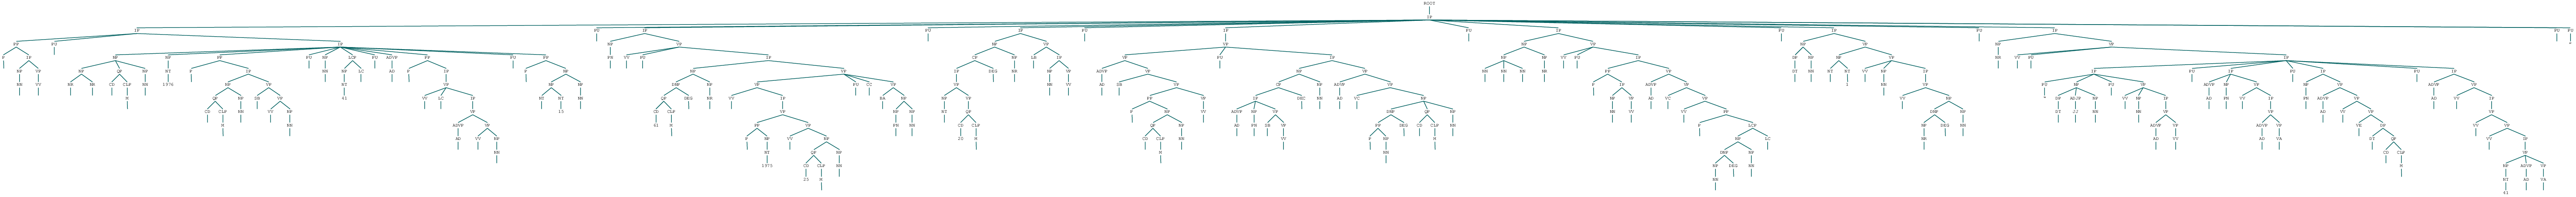

In [84]:
parse_tree

In [97]:
"""从下面的结果来看，基本可以提取出人物的言论，只是双引号并没有很好的处理"""

search(parse_tree)

[(['沃金斯'], '说', '“这真梦幻，令人难以置信，但我感觉很好，我早料到有这一天，但想不到要等41年那么长'),
 (['米契尔'], '说', '根据头发定罪不是建立在科学的基础上')]

In [70]:
"""
首先把可能包含人物言论的句子，根据关键词挑出来
我们试试更长更多新闻。
"""

article_with_talk = []

for article in content[:100]:
    pattern = re.compile(r'表示|认为|指出|告诉|说|提出|强调|坦言|感叹')
    if pattern.findall(article):
        article_with_talk.append(article)

In [71]:
len(article_with_talk)

69

In [99]:
article_with_talk[30]

'\u3000\u3000文章导读： 阿里巴巴集团CEO张勇表示，阿里巴巴集团愿意运用自身的一切能力帮助品牌企业实现商业数字化，共同开启新零售。\r\n\u3000\u3000责编：周琦\r\n\u3000\u3000（本文刊发于《中国经济周刊》2017年第24期）\r\n\u3000\u30006月8日，在杭州召开的阿里巴巴投资者日大会上，当阿里巴巴集团CFO武卫说出阿里巴巴集团2018财年收入指引为增长45%~49%时，台下350多位来自世界各地的机构投资者和分析师不约而同地发出了惊叹。武卫给出的2018财年营收预计同比增长数字，远远超出之前市场36%~38%的分析预测。\r\n\u3000\u3000当日，阿里巴巴的股价暴涨13.29%，收于142.34美元，总市值一度超过3600亿美元，再次超过腾讯的3323亿美元市值，成为亚洲市值最大公司，全球排名第七。单单这一日，阿里巴巴的市值增幅就超过了400亿美元。实际上，总市值超过这个数字的中国公司也并不多，3000亿元人民币是去年进入中国公司市值Top20的门槛线，百度的市值在620亿美元左右，京东市值约550亿美元。\r\n\u3000\u3000在如此惊人的体量基础之上，还要实现近50%的年增长率，阿里巴巴的底气在哪里？谁来为阿里巨轮提供如此强大的引擎？实际上，阿里巴巴以天猫为引擎驱动的新零售战略已经成为外界关注的焦点。\r\n\u3000\u3000“新零售是阿里巴巴面向未来所做出的全新战略愿景规划，是大数据驱动的线上线下融合，是零售核心元素的数字化。”阿里巴巴集团CEO张勇表示，阿里巴巴集团愿意运用自身的一切能力帮助品牌企业实现商业数字化，共同开启新零售。\r\n\u3000\u3000天猫“变脸”展现野心\r\n\u3000\u3000今年5月24日，天猫宣布完成有史以来最重要的一次全面升级，品牌口号从“上天猫就够了”变为“理想生活上天猫”。不少消费者明显感知到了天猫的“变脸”，但更重要的是，在这些表象背后是天猫所想要展现出的新的商业力量和巨大野心。\r\n\u3000\u3000在阿里巴巴集团CMO董本洪看来，未来的天猫不只是帮品牌卖更多货，消费者也不是上天猫买到东西就够了，而是到天猫来寻找理想生活。\r\n\u3000\u3000根据易观发布的数据，2016年中国网上零售市场规模达4.97万亿元，同

In [122]:
s = parse_sentence(article_with_talk[30])

In [123]:
print(s)

(ROOT
  (IP
    (IP
      (NP (NN 文章) (NN 导读))
      (PU ：)
      (IP
        (NP (NP (NP (NR 阿里巴巴) (NN 集团)) (NP (NN CEO))) (NP (NR 张勇)))
        (VP
          (VV 表示)
          (PU ，)
          (IP
            (NP (NR 阿里巴巴) (NN 集团))
            (VP
              (VV 愿意)
              (IP
                (VP
                  (VP
                    (VV 运用)
                    (NP
                      (DNP (NP (PN 自身)) (DEG 的))
                      (DP (DT 一切))
                      (NP (NN 能力))))
                  (VP
                    (VV 帮助)
                    (NP (NN 品牌) (NN 企业))
                    (IP
                      (VP
                        (VV 实现)
                        (NP
                          (NP (NN 商业))
                          (ADJP
                            (ADJP (JJ 数字化))
                            (PU ，)
                            (IP
                              (VP
                                (ADVP (AD 共同))
                               

In [124]:
search(s)

[('张勇', '表示', '阿里巴巴集团愿意运用自身的一切能力帮助品牌企业实现商业数字化，共同开启新零售。责编')]

In [120]:
"""把100条新闻中的人物言论提取出来，
可以看到，京东、光大 这些机构也提取出来了，可见还需要优化。
可以结合命名实体识别，把非人物的实体（机构、地点）等过滤掉，进一步得到更准确的结果。
"""

for article in article_with_talk:
    print(search(parse_sentence(article)))

False
False
False
[('光大', '指出', '利好并未引起市场太大的热情，两市指数和成交量均较为平淡'), ('李立峰', '指出', '最新方案中包含的222只成分股中，剔除了中等市值、非互联互通可交易的股票以及有停牌限制的标的，由于纳入了很多大市值AH股，A股在MSCIEM中的权重由05%上升到了073%。其中，金融板块占比最高，达到4011%，泛消费次之，占比为2426%，两个板块涵盖了大部分权重股。动态来看，由于加入了很多是指占比高的金融公司，金融板块的权重增加了近一半，其他大部分行业权重都受到了稀释。尽管A股被纳入MSCI这一利好事件对短期市场情绪有所提振、对中长期海外增量资金预期升温，但短期内，市场量能尚不能有效放大，金融股独乐乐情景也就难以持续')]
[('忠生', '表示', '我敢打赌，12个月之后，在座的各位手机都会换掉')]
False
False
[('廖云龙', '认为', '银行股脱颖而出的主要原因是低估值'), ('华泰', '表示', '在纳入MSCI指数之后，A股将迎来约850亿元人民币的增量资金')]
False
False
False
False
False
False
False
False
False
[('帕里斯', '认为', '现在，梅应对火灾的行动表明，她缺乏判断力，“若无法重建公众信任，这个首相当不久”')]
False
False
[('比哈尔邦', '告诉', '有一种致命的热浪叫“鲁”，犹如高温海啸，主要发生在农村')]
False
False
False
False
[('京东', '表示', '经过半年多的努力，这辆无人配送车的成本已经基本上接近奇瑞QQ高配版的价格（5万元左右）。无人配送车造价降低了，也降低了配送的成本')]
False
[('乐视', '表示', '“两大第三方电商平台，在我们的优惠力度上，仍强行通过优惠券、满额返现等方式进行价格补贴，并且这些补贴多数成本仍强迫我们买单，远远超出了我们的承受能力')]
False
False
[('张勇', '表示', '阿里巴巴集团愿意运用自身的一切能力帮助品牌企业实现商业数字化，共同开启新零售。责编')]
False
False
False
False
False
False
False
False
False
False
Fa

In [117]:
sentence = "故宫的保护、研究，最终落脚点是满足老百姓的需求。王旭东强调：“让文物活起来的内涵，并不是让文物本身走出故宫、满世界漫游。”"
s = parse_sentence(sentence)
s.draw()

In [119]:
search(s)

[('王旭东', '强调', '“让文物活起来的内涵，并不是让文物本身走出故宫、满世界漫游。”')]